# Car Search

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm

df = pd.read_csv('cars.csv')


In [130]:
df['mileage'] = df['mileage'].str.extract('((?:\d{1,3}(?:,\d{3})*))')
df['mileage'] = pd.to_numeric(df['mileage'].str.replace(',',''))
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
# df['mileage'] = df['mileage'].astype(str).apply(lambda x: int(x.replace(',', '')))
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['value_per_mile'] = df['price'] / df['mileage']

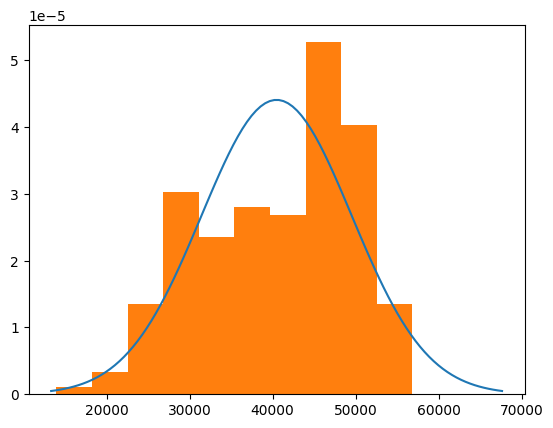

In [131]:
# Stats stuff
mean = df['price'].mean()
std = df['price'].std()

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x , 1/(std*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*std**2)))
plt.hist(df['price'], bins=10, density=True)
plt.show()

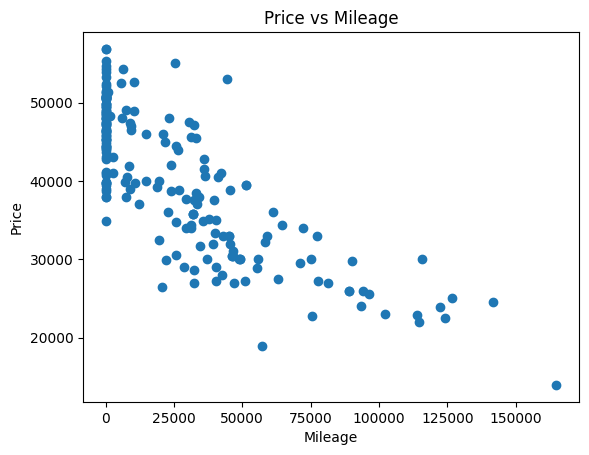

In [132]:
# Create a scatter plot of price vs mileage
plt.scatter(df['mileage'], df['price'])
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

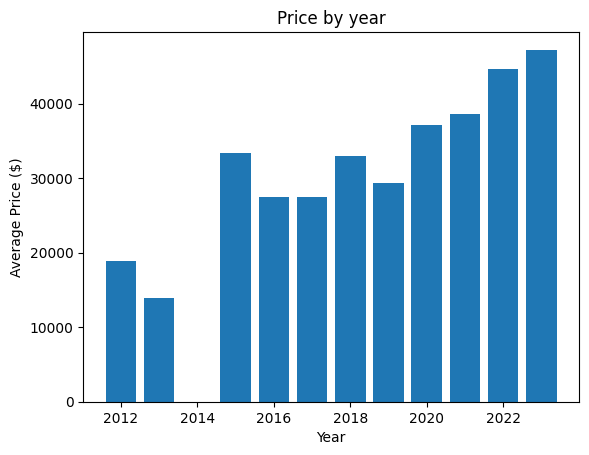

In [133]:
# Create a scatter plot of price vs mileage
average_price_by_year = df.groupby('year')['price'].mean()
plt.bar(average_price_by_year.index, average_price_by_year.values)
plt.title("Price by year")
plt.xlabel('Year')
plt.ylabel("Average Price ($)")
plt.show()


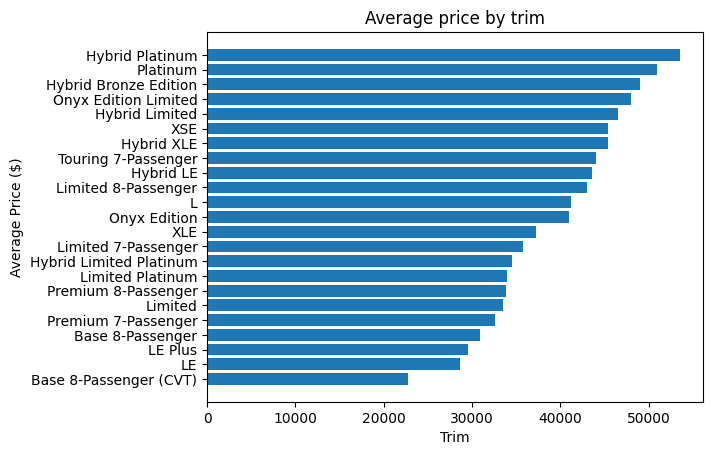

In [134]:
average_price_by_year = df.groupby('trim')['price'].mean()
average_price_by_year = average_price_by_year.sort_values()
plt.barh(average_price_by_year.index, average_price_by_year.values)
plt.title("Average price by trim")
plt.xlabel('Trim')
plt.ylabel("Average Price ($)")
plt.show()

In [135]:
cat_vars = ['trim','model']
ohe = OneHotEncoder()
ohe.fit(df[cat_vars])
cat_data = ohe.transform(df[cat_vars]).toarray()
cat_df = pd.DataFrame(cat_data, columns=ohe.get_feature_names_out(cat_vars))

num_vars = ['price','mileage','year']
df_processed = pd.concat([df[num_vars], cat_df],axis=1)
df_processed = df_processed.dropna()

X = df_processed.drop('price', axis=1)
y = df_processed['price']
model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)

residuals = y - pred

outliers = residuals[np.abs(residuals) > 1000].index

df_outliers = df.loc[outliers]
pd.options.display.width = 0
pd.options.display.max_colwidth = 0
df_outliers.groupby(['model','url'])['price'].mean().nsmallest()



model       url                                                                     
Highlander  https://www.cars.com/vehicledetail/ce339a80-9087-4431-a11f-d52c9322b200/    13950.0
            https://www.cars.com/vehicledetail/e8872cb7-831a-4dd1-ba6c-513f13e57de6/    18888.0
            https://www.cars.com/vehicledetail/9ea58901-7f0b-468a-a372-cbadf290df02/    23998.0
            https://www.cars.com/vehicledetail/95f681e3-c714-49cc-965c-91d875e1491f/    24531.0
            https://www.cars.com/vehicledetail/0139a759-b8f2-49fe-9b03-ab02f043225b/    25517.0
Name: price, dtype: float64

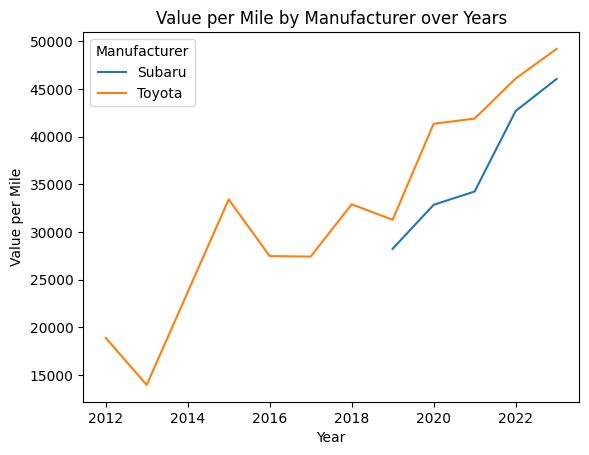

In [136]:
grouped = df.groupby(['manufacturer','year'])['price'].mean()
pivot_table = grouped.unstack(0)
ax = pivot_table.plot(kind='line')
ax.set_title('Value per Mile by Manufacturer over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Value per Mile')

ax.legend(title='Manufacturer')
# Display the chart
plt.show()

In [143]:
bins = [0, 10000, 20000, 30000, float('inf')]
subaru['mileage_bucket'] = pd.cut(subaru['mileage'], bins=bins)

grouped = subaru.groupby(['trim', 'mileage_bucket']).agg({'price': ['mean', 'std']})
grouped.dropna()

/tmp/ipykernel_45989/4049097707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subaru['mileage_bucket'] = pd.cut(subaru['mileage'], bins=bins)


price             
                                                 mean          std
trim                 mileage_bucket                               
Limited 7-Passenger  (0.0, 10000.0]      43111.714286  3991.261819
                     (20000.0, 30000.0]  36848.000000  1203.495742
                     (30000.0, inf]      28547.555556  3482.253297
Limited 8-Passenger  (0.0, 10000.0]      43553.800000  2574.924698
Onyx Edition Limited (0.0, 10000.0]      47986.000000  978.208567 
Premium 7-Passenger  (20000.0, 30000.0]  30202.500000  405.172186 
                     (30000.0, inf]      29682.666667  4021.846632
Premium 8-Passenger  (0.0, 10000.0]      39631.000000  128.000000 
                     (20000.0, 30000.0]  27750.000000  1767.766953
                     (30000.0, inf]      29720.250000  2222.550543
Touring 7-Passenger  (0.0, 10000.0]      47933.176471  3666.840146
                     (30000.0, inf]      34973.500000  4051.177495

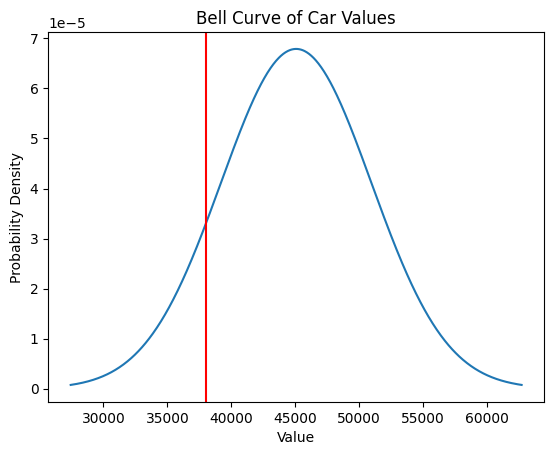

In [139]:
mean = 45067.173913
std_dev= 5875.630424

dist = norm(loc=mean, scale=std_dev)
x_values = np.linspace(mean - 3 * std_dev,mean + 3 * std_dev, num=1000)
y_values = dist.pdf(x_values)
plt.plot(x_values, y_values)
car_value = 38000
plt.axvline(x=car_value, color='r')
plt.title('Bell Curve of Car Values')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

In [164]:
touring = subaru[subaru['trim'] == 'Touring 7-Passenger']
touring

,year,manufacturer,model,trim,mileage,price,dealer,url,value_per_mile,mileage_bucket
2,2023,Subaru,Ascent,Touring 7-Passenger,10.0,50433,Jenkins Subaru of Ocala,https://www.cars.com/vehicledetail/b7f53165-c92a-4734-bf86-47be319a6350/,5.043300e+03,"(0.0, 10000.0]"
4,2023,Subaru,Ascent,Touring 7-Passenger,6.0,49420,Subaru Lakeland,https://www.cars.com/vehicledetail/14b91022-99fb-4c2c-9997-ed69c9661941/,8.236667e+03,"(0.0, 10000.0]"
17,2019,Subaru,Ascent,Touring 7-Passenger,81494.0,26959,Birmingham Broker,https://www.cars.com/vehicledetail/4ec53274-1081-4df8-8882-a5867effd44f/,3.308096e-01,"(30000.0, inf]"
18,2022,Subaru,Ascent,Touring 7-Passenger,6005.0,47987,Johnson Subaru of Cary,https://www.cars.com/vehicledetail/8ccf1d2e-66e0-4057-9579-aac2e6ab3606/,7.991174e+00,"(0.0, 10000.0]"
22,2023,Subaru,Ascent,Touring 7-Passenger,0.0,50738,Subaru North Orlando,https://www.cars.com/vehicledetail/8a025758-664b-4df6-ba42-ce6b9bb72d57/,inf,NaN
23,2023,Subaru,Ascent,Touring 7-Passenger,0.0,50738,Subaru North Orlando,https://www.cars.com/vehicledetail/8a025758-664b-4df6-ba42-ce6b9bb72d57/,inf,NaN
24,2023,Subaru,Ascent,Touring 7-Passenger,5.0,49420,Subaru Lakeland,https://www.cars.com/vehicledetail/f690bee3-4b8a-442e-a34a-cff9e1c733bb/,9.884000e+03,"(0.0, 10000.0]"
25,2020,Subaru,Ascent,Touring 7-Passenger,32008.0,35767,Jarrett Scott Ford,https://www.cars.com/vehicledetail/38d3cee5-cb7a-49a1-9999-b9832315b033/,1.117439e+00,"(30000.0, inf]"
26,2020,Subaru,Ascent,Touring 7-Passenger,32008.0,35767,Jarrett Scott Ford,https://www.cars.com/vehicledetail/38d3cee5-cb7a-49a1-9999-b9832315b033/,1.117439e+00,"(30000.0, inf]"
27,2020,Subaru,Ascent,Touring 7-Passenger,32008.0,35767,Jarrett Scott Ford,https://www.cars.com/vehicledetail/38d3cee5-cb7a-49a1-9999-b9832315b033/,1.117439e+00,"(30000.0, inf]"
